# Laser Tag Problem

Originally studied in Somani, A. et al. (2013). “DESPOT: Online POMDP planning with regularization”. In: Advances in Neural Information Processing Systems (NIPS).

This version has a continuous observation space.

Lines of Code:
- Original C++ implementation: >1151
- POMDPs.jl implementation: 355

In [1]:
using POMDPToolbox
using LaserTag
using QMDP
using ParticleFilters
using Interact
value = Interact.value;

value (generic function with 2 methods)

In [2]:
problem = gen_lasertag()
solver = QMDPSolver()
policy = solve(solver, problem)
pf = SIRParticleFilter(problem, 10000);

Simulating...100%|██████████████████████████████████████| Time: 0:00:01


Interact.Options{:SelectionSlider,Int64}(1: "input" = 12 Int64 ,"i",12,"12",Interact.OptionDict(DataStructures.OrderedDict("1"=>1,"2"=>2,"3"=>3,"4"=>4,"5"=>5,"6"=>6,"7"=>7,"8"=>8,"9"=>9,"10"=>10…),Dict(18=>"18",2=>"2",16=>"16",11=>"11",21=>"21",7=>"7",9=>"9",10=>"10",19=>"19",17=>"17"…)),Any[],Any[],true,"horizontal")

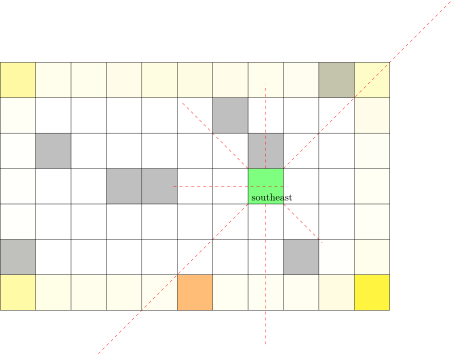

In [3]:
sim = HistoryRecorder(max_steps=100, show_progress=true)
hist = simulate(sim, problem, policy, pf)
ns = n_steps(hist)
@manipulate for i in 1:ns
    LaserTagVis(problem,
                s=state_hist(hist)[i+1],
                a=action_hist(hist)[i+1],
                o=observation_hist(hist)[i],
                b=belief_hist(hist)[i+1])
end

In [4]:
using DiscreteValueIteration
using POMCPOW

In [5]:
solver = POMCPOWSolver(tree_queries=1000,
                       criterion=MaxUCB(10.0),
                       final_criterion=MaxTries(),
                       max_depth=100,
                       enable_action_pw=false,
                       k_observation=4.0,
                       alpha_observation=1/20,
                       estimate_value=FOValue(ValueIterationSolver()),
                       check_repeat_act=false,
                       check_repeat_obs=false,
                       init_N=InevitableInit(),
                       init_V=InevitableInit(),
                       rng=MersenneTwister(13)
)
policy = solve(solver, problem);

In [6]:
sim = HistoryRecorder(max_steps=100, show_progress=true)
hist = simulate(sim, problem, policy, pf)

Simulating...100%|██████████████████████████████████████| Time: 0:00:00


POMDPToolbox.POMDPHistory{LaserTag.LTState,Int64,StaticArrays.MVector{8,Float64},ParticleFilters.ParticleCollection{LaserTag.LTState}}(LaserTag.LTState[LaserTag.LTState([2,5],[10,6],false),LaserTag.LTState([3,5],[10,7],false),LaserTag.LTState([4,5],[11,7],false),LaserTag.LTState([5,4],[11,7],false),LaserTag.LTState([6,4],[11,7],false),LaserTag.LTState([7,4],[11,7],false),LaserTag.LTState([7,3],[11,7],false),LaserTag.LTState([8,2],[11,7],false),LaserTag.LTState([7,3],[11,7],false),LaserTag.LTState([6,3],[11,7],false)  …  LaserTag.LTState([6,3],[11,7],false),LaserTag.LTState([7,3],[11,7],false),LaserTag.LTState([8,4],[11,7],false),LaserTag.LTState([8,5],[11,7],false),LaserTag.LTState([9,6],[11,7],false),LaserTag.LTState([9,5],[11,7],false),LaserTag.LTState([10,6],[11,7],false),LaserTag.LTState([10,7],[11,7],false),LaserTag.LTState([11,7],[11,7],false),LaserTag.LTState([140267363343504,140267368925616],[140267363343504,140267368925616],true)],[3,3,6,3,3,2,6,8,4,5  …  2,3,5,1,5,2,5,1,3,9],

Interact.Options{:SelectionSlider,Int64}(5: "input-2" = 12 Int64 ,"i",12,"12",Interact.OptionDict(DataStructures.OrderedDict("1"=>1,"2"=>2,"3"=>3,"4"=>4,"5"=>5,"6"=>6,"7"=>7,"8"=>8,"9"=>9,"10"=>10…),Dict(18=>"18",2=>"2",16=>"16",11=>"11",21=>"21",7=>"7",9=>"9",10=>"10",19=>"19",17=>"17"…)),Any[],Any[],true,"horizontal")

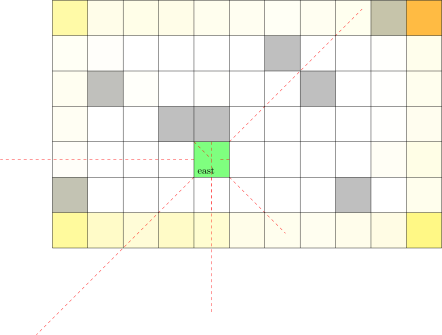

In [7]:
ns = n_steps(hist)
@manipulate for i in 1:ns
    LaserTagVis(problem,
                s=state_hist(hist)[i+1],
                a=action_hist(hist)[i+1],
                o=observation_hist(hist)[i],
                b=belief_hist(hist)[i+1])
end

In [11]:
POMCPOWVisualizer(get(policy.tree))

POMCPOW.POMCPOWVisualizer(POMCPOW.POMCPOWTree{POMCPOW.POWNodeBelief{LaserTag.LTState,Int64,StaticArrays.MVector{8,Float64},LaserTag.LaserTagPOMDP},Int64,StaticArrays.MVector{8,Float64},ParticleFilters.ParticleCollection{LaserTag.LTState}}([51,17,23,22,33,35,18,16,784,1  …  1,1,1,1,1,1,1,1,1,1],[7.22734,4.44971,5.27866,5.25231,6.20972,6.49436,4.52234,4.32461,10.0,-1.0  …  10.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-11.0],Array{Pair{StaticArrays.MVector{8,Float64},Int64},1}[Pair{StaticArrays.MVector{8,Float64},Int64}[[-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0]=>11,[-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0]=>15,[-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0]=>22,[-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0]=>30,[-2.60699,0.792026,-4.44512,-5.19218,3.41941,4.00803,9.61904,6.17641]=>36],Pair{StaticArrays.MVector{8,Float64},Int64}[[-1.9917,5.284,-1.74054,7.01762,-0.887326,-1.50896,6.41605,0.072355]=>10,[2.83444,1.84536,-4.75865,2.87381,2.6035,-5.29643,7.91055,0.127507]=>18,[-1.94052,0.96369,-2.0499,5.91313,-0.594174,-0.750319,9.2946,0.556546]=>31,[-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0]=>39,[-0.128254,1.55843,3.64939,4.09431,-2.35012,-2.9052,6.21641,7.24916]=>46],Pair{StaticArrays.MVector{8,Float64},Int64}[[-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0]=>9,[0.741801,-1.67711,-3.00167,1.07338,1.20143,1.9041,7.93754,3.48396]=>14,[-1.02686,8.1907,4.09654,-3.97892,-0.185334,2.80854,5.75365,-2.39532]=>26,[-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0]=>37,[-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0]=>43],Pair{StaticArrays.MVector{8,Float64},Int64}[[-1.04304,4.56437,-3.14884,6.61191,-0.655498,1.57487,-3.54689,1.35724]=>8,[1.77648,3.73582,-6.00525,11.1024,-0.314508,-1.58298,0.4096,0.383348]=>17,[-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0]=>28,[2.82012,5.41188,-1.46049,12.1252,2.14261,1.23219,0.134031,-2.20061]=>34,[-4.53361,4.52713,0.54039,7.77955,4.46701,3.82344,6.94756,-1.93859]=>40],Pair{StaticArrays.MVector{8,Float64},Int64}[[-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0]=>7,[-0.134562,-1.50343,0.728411,-1.80459,-2.82202,-0.0783334,9.65972,0.86165]=>13,[-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0]=>25,[-3.00644,0.921128,-2.69521,3.0201,-2.86188,-3.96943,8.15092,3.74263]=>33,[-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0]=>42],Pair{StaticArrays.MVector{8,Float64},Int64}[[-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0]=>6,[-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0]=>12,[-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0]=>21,[-0.276244,3.34087,0.845698,-1.70132,-3.55621,1.42389,9.95089,-2.79619]=>29,[-0.709716,2.56799,0.156445,1.69803,1.46613,-0.533049,7.36086,2.9465]=>38],Pair{StaticArrays.MVector{8,Float64},Int64}[[-1.0154,4.50847,0.530804,4.37204,1.19329,-0.136929,6.85722,0.703853]=>5,[-3.34307,4.69822,-1.43173,3.46084,0.578307,5.95709,3.72847,1.31038]=>16,[-0.433051,6.89474,3.76647,3.58264,1.34885,6.42616,8.25866,2.31697]=>24,[-2.89886,5.68111,2.10149,-3.78789,1.56526,2.88842,7.30399,4.8253]=>35,[0.832129,2.49349,-1.44975,2.86561,-1.79809,-1.75704,9.12687,2.14471]=>41],Pair{StaticArrays.MVector{8,Float64},Int64}[[1.58348,0.341329,-0.643424,0.412318,-1.89638,1.53871,5.706,0.18329]=>4,[-1.68129,9.45466,-2.19904,-4.15904,-0.384147,0.43195,10.6557,0.642534]=>20,[0.101019,8.67871,-2.307,-2.12456,-2.84392,-6.47358,8.22455,2.13156]=>32,[-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0]=>45,[1.26523,5.18326,-1.45491,0.590781,-1.47921,-3.0653,7.64262,3.63861]=>51],Pair{StaticArrays.MVector{8,Float64},Int64}[[1.43363,3.39724,-0.112049,-4.06949,-0.608615,-1.0258,1.37688,3.06438]=>2,[-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0]=>3,[-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0]=>19,[-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0]=>23,[-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0]=>27,[2.31955,-0.167446,-0.0380677,0.112181,-1.05713,2.69601,-1.78611,-0.65892]=>118],Pair{StaticArrays.MVector{8,Float64},Int64}[]  …  Pair{StaticArrays.MVector{8,Float64},Int64}[],Pair{StaticArrays.MVector{8,Float64},Int64}[],Pair{StaticArrays.MVector{8,Float64},Int64}[],Pair{StaticArrays.MVector{8,Float64},Int64}[],Pair{StaticArrays.MVector{8,Float64},Int64}[],